- Regresion logistica: La regresión logística es adecuada para problemas de clasificación donde la variable objetivo es categórica, por lo que no nos interesa. Probamos la regresion lineal: 

## regresion lineal

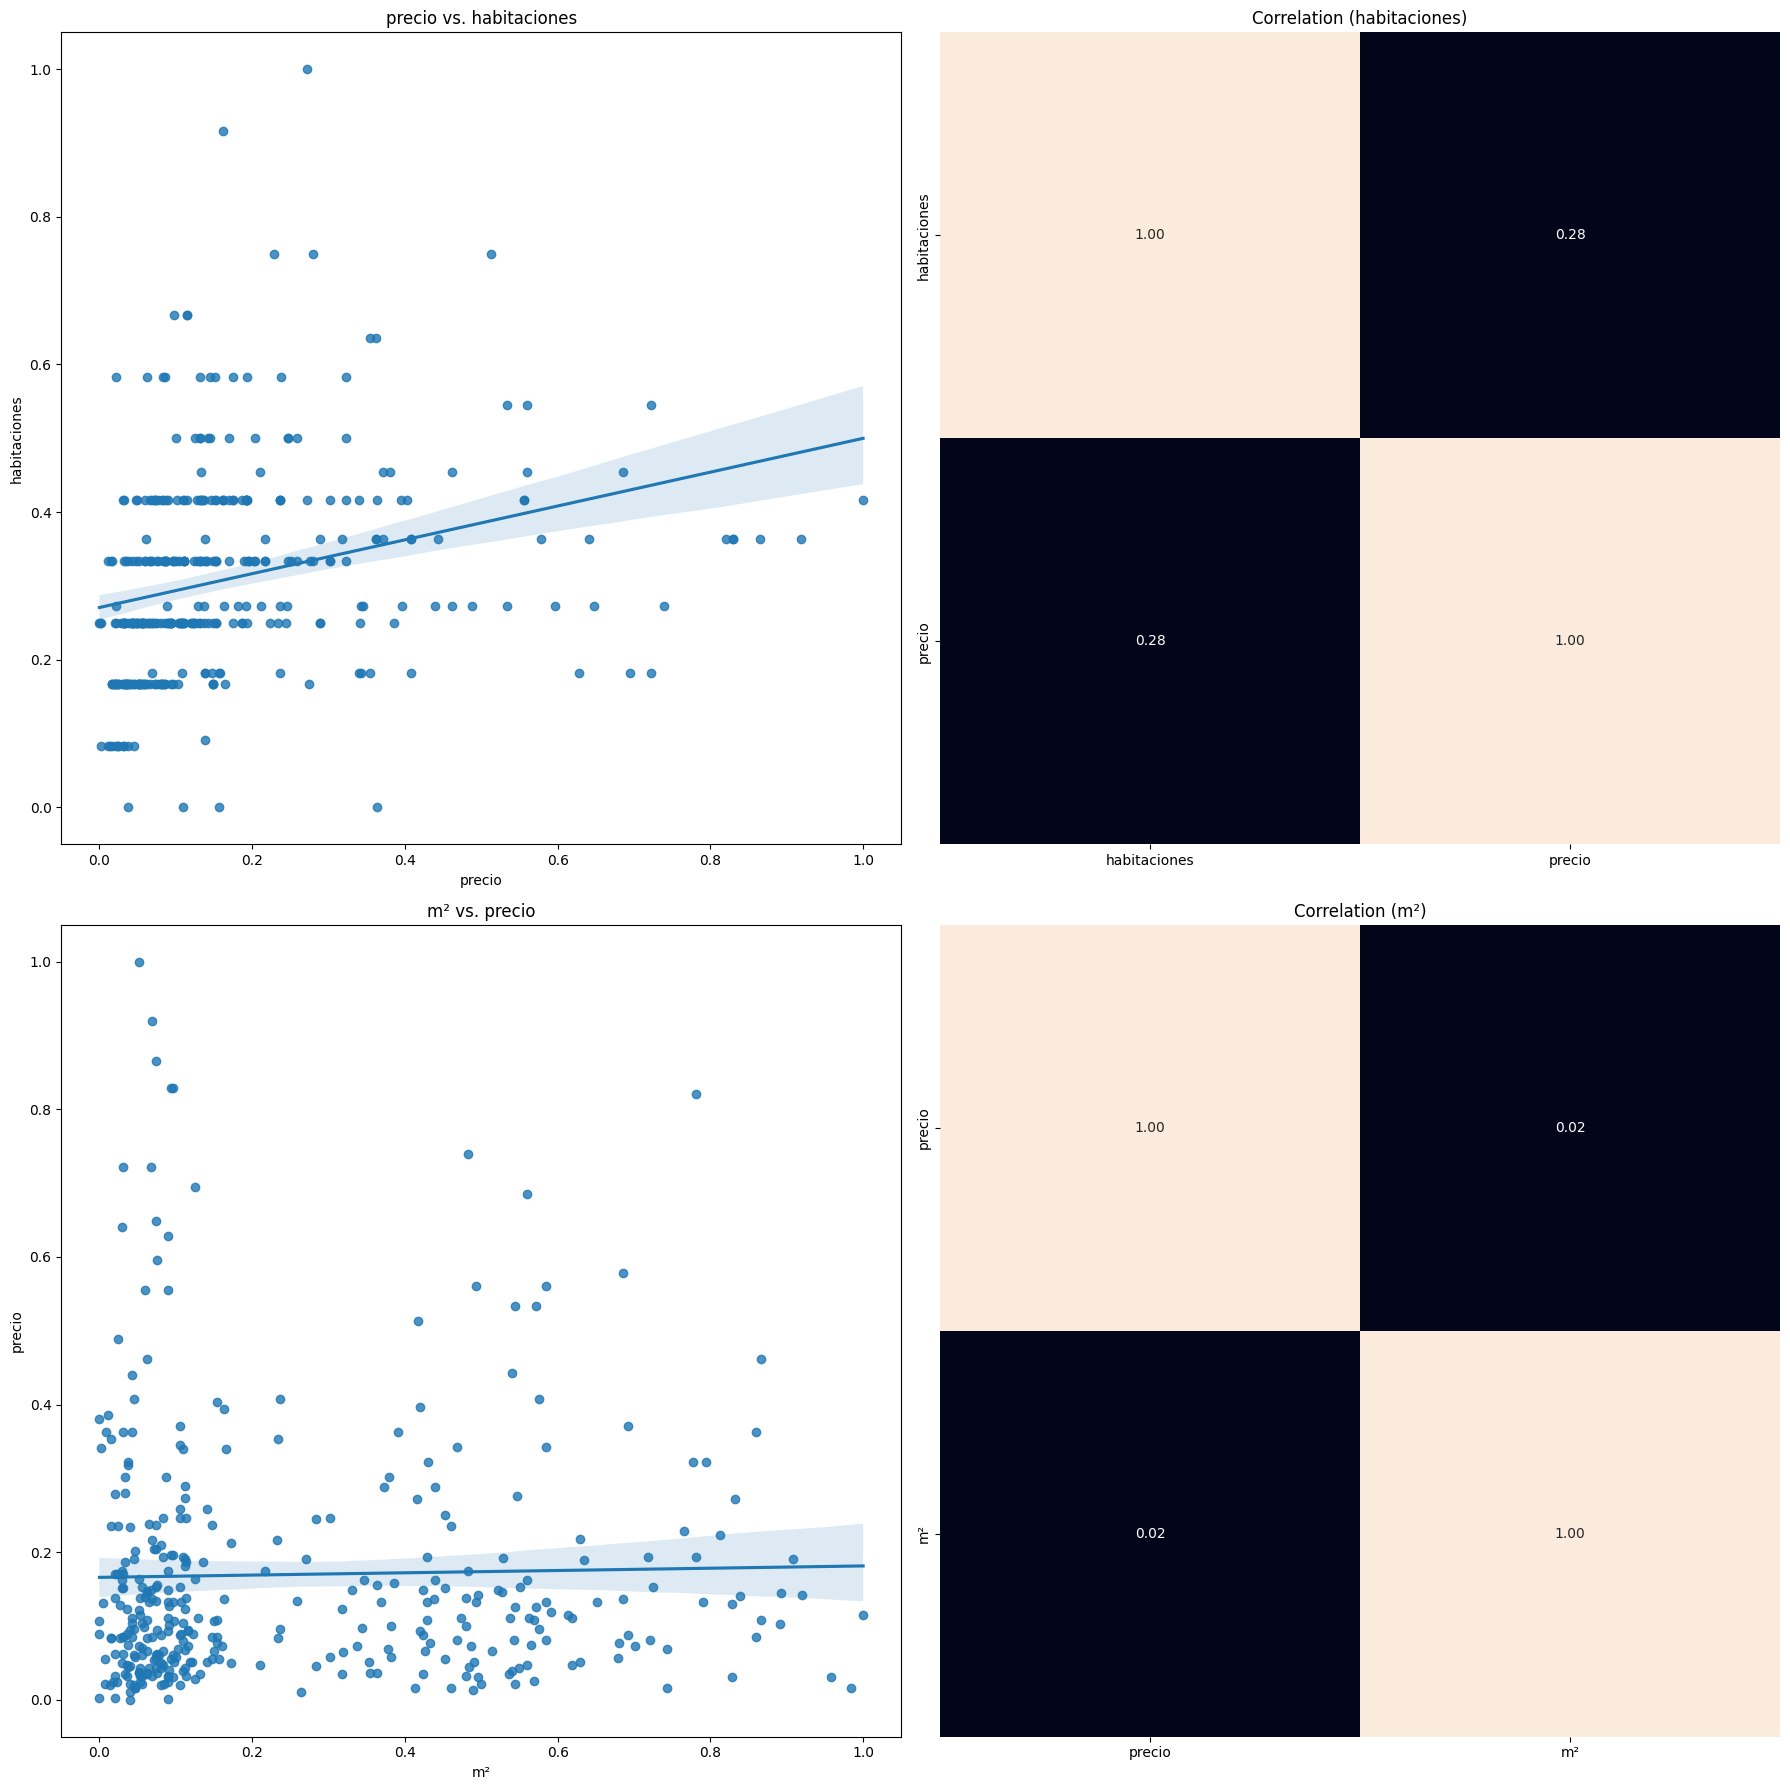

Intercepto (a): 0.028603385352251515
Coeficientes (b1, b2): [ 0.30514578 -0.00605014]
Error cuadrático medio: 0.2688111866547784
Coeficiente de determinación (R2): -1.2374612638446174


In [6]:
# Paso 1: Lectura del conjunto de datos procesado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error


# Lectura de los datos de entrenamiento y prueba
train_data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/train_selected_A Coruña.csv')
test_data = pd.read_csv('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/test_selected.csv_A Coruña.csv')

train_data.head()

# Diagramas de dispersión y correlaciones
fig, axis = plt.subplots(2, 2, figsize=(18, 18))
total_data = pd.concat([train_data, test_data])

# Scatter Plot 1
sns.regplot(data=total_data, x="precio", y="habitaciones", ax=axis[0, 0])
axis[0, 0].set_title("precio vs. habitaciones")

# Heatmap 1
sns.heatmap(total_data[["habitaciones", "precio"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[0, 1].set_title("Correlation (habitaciones)")

# Scatter Plot 2
sns.regplot(data=total_data, x="m²", y="precio", ax=axis[1, 0])
axis[1, 0].set_title("m² vs. precio")

# Heatmap 2
sns.heatmap(total_data[["precio", "m²"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Correlation (m²)")

plt.tight_layout()
plt.show()

# Paso 2: Inicialización y entrenamiento del modelo
from sklearn.linear_model import LinearRegression

# Variables predictoras y variable objetivo
X_train = train_data[['habitaciones', 'm²']]
y_train = train_data['precio']
X_test = test_data[['habitaciones', 'm²']]
y_test = test_data['precio']

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Después del proceso de entrenamiento podemos conocer los parámetros que ha ajustado el modelo
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

# Paso 3: Predicción del modelo
y_pred = model.predict(X_test)

# Paso 4: Evaluación del modelo
from sklearn.metrics import mean_absolute_error, r2_score

print(f"Error cuadrático medio: {mean_absolute_error(y_test, y_pred)}")
print(f"Coeficiente de determinación (R2): {r2_score(y_test, y_pred)}")


In [7]:
train_data

,precio,habitaciones,m²
0,0.032599,0.166667,0.020089
1,0.174428,0.250000,0.482143
2,0.020745,0.166667,0.104911
3,0.070703,0.250000,0.055804
4,0.085521,0.583333,0.031250
...,...,...,...
291,0.115157,0.416667,0.053571
292,0.022015,0.166667,0.040179
293,0.138865,0.333333,0.060268
294,0.087638,0.416667,0.104911


In [3]:
test_data

,precio,habitaciones,m²
0,0.132855,0.454545,0.089286
1,0.138241,0.181818,0.020089
2,0.628366,0.181818,0.089286
3,0.488330,0.272727,0.024554
4,0.157989,0.181818,0.386161
...,...,...,...
62,0.061041,0.363636,0.055804
63,0.245961,0.272727,0.301339
64,0.353680,0.181818,0.234375
65,0.820467,0.363636,0.781250


In [4]:
y_pred

array([0.16676582, 0.08396289, 0.08354425, 0.11167641, 0.08174811,
       0.13575714, 0.13911983, 0.16692788, 0.08265293, 0.11140631,
       0.11114972, 0.10681469, 0.16432146, 0.10658511, 0.11133879,
       0.16681984, 0.1113793 , 0.13889025, 0.13436615, 0.1113658 ,
       0.19485747, 0.08367929, 0.08339569, 0.13541952, 0.0837063 ,
       0.11119024, 0.13938993, 0.13899829, 0.19150829, 0.222598  ,
       0.10890793, 0.07958735, 0.10879989, 0.13898478, 0.13933591,
       0.16391632, 0.19158932, 0.16730601, 0.13537901, 0.13929539,
       0.02640211, 0.0560198 , 0.08332817, 0.08362527, 0.0834227 ,
       0.11151435, 0.22269253, 0.13608126, 0.1393089 , 0.16667129,
       0.10862433, 0.10928607, 0.1085298 , 0.08054619, 0.13629733,
       0.13914684, 0.10898896, 0.08064072, 0.08363878, 0.11156837,
       0.1107851 , 0.11093365, 0.13922787, 0.11000182, 0.08266644,
       0.13483882, 0.13666196])

In [5]:
y_test

0     0.132855
1     0.138241
2     0.628366
3     0.488330
4     0.157989
        ...   
62    0.061041
63    0.245961
64    0.353680
65    0.820467
66    0.138241
Name: precio, Length: 67, dtype: float64

## optimizacion con gridsearch

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Definimos los hiperparámetros que queremos ajustar
hyperparams = {
    'copy_X': [True, False],
}

# Inicializamos la búsqueda en cuadrícula
grid = GridSearchCV(model, hyperparams, scoring='neg_mean_squared_error', cv=5)

# Realizamos la búsqueda en cuadrícula en los datos de entrenamiento
grid.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Obtenemos el mejor modelo
best_params = grid.best_params_
best_model = grid.best_estimator_

# Realizamos predicciones en los datos de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calculamos el Error Cuadrático Medio (MSE)
mse = mean_absolute_error(y_test, y_pred)

# Mostramos los resultados
print(f"Mejores hiperparámetros: {best_params}")
print(f"Test MSE: {mse}")


Mejores hiperparámetros: {'copy_X': True}
Mejores hiperparámetros: {'copy_X': True}
Test MSE: 0.2688111866547784


## optimizacion con random search

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_dist = {'alpha': np.logspace(-3, 2, 100)}  # Valores de alpha en una escala logarítmica

# Inicializa la búsqueda aleatoria
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realiza la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = random_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = random_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.26560877829466867
Test MSE (Ridge): 0.2688393626678431


In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import numpy as np
from skopt import BayesSearchCV

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define el espacio de búsqueda de hiperparámetros
param_dist = {'alpha': (1e-6, 100.0, 'log-uniform')}  # Rango de alpha en escala logarítmica

# Inicializa la optimización bayesiana
bayes_search = BayesSearchCV(ridge_model, param_dist, n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Realiza la optimización bayesiana en los datos de entrenamiento
bayes_search.fit(X_train, y_train)

# Obtiene el mejor valor de alpha y el mejor modelo Ridge
best_params = bayes_search.best_params_
best_alpha = best_params['alpha']
best_ridge_model = bayes_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.26120406788876493
Test MSE (Ridge): 0.2688389135916815


---

## regresion lineal regularizada

In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Inicializa el modelo Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario

# Ajusta el modelo a los datos de entrenamiento
ridge_model.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_ridge = ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Calcula el coeficiente de determinación (R^2)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Test MSE (Ridge): {mse_ridge}")
print(f"Test R^2 (Ridge): {r2_ridge}")


Test MSE (Ridge): 0.268906865090895
Test R^2 (Ridge): -1.245516533968659


In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Crear un modelo de regresión Lasso
lasso_model = Lasso()

# Definir una cuadrícula de hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Inicializar la búsqueda en cuadrícula con validación cruzada (CV)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Realizar predicciones en los datos de prueba
y_pred_lasso = best_lasso_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2)
mse_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Mostrar resultados
print(f"Mejor valor de alpha: {best_alpha}")
print(f"Test MSE (Lasso): {mse_lasso}")
print(f"Test R^2 (Lasso): {r2_lasso}")


Mejor valor de alpha: 0.001
Test MSE (Lasso): 0.2688678807034594
Test R^2 (Lasso): -1.2461851411633522


## optimizacion con gridsearch

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Inicializa la búsqueda en cuadrícula
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realiza la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = grid_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha: {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha: 0.1
Test MSE (Ridge): 0.268822063202346


## optimizacion con random search

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define los hiperparámetros y sus posibles valores
param_dist = {'alpha': np.logspace(-3, 2, 100)}  # Valores de alpha en una escala logarítmica

# Inicializa la búsqueda aleatoria
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realiza la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros
best_params = random_search.best_params_
best_alpha = best_params['alpha']

# Obtiene el mejor modelo Ridge con los mejores hiperparámetros
best_ridge_model = random_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.26560877829466867
Test MSE (Ridge): 0.2688393626678431


## optimizacion bayesana

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import numpy as np
from skopt import BayesSearchCV

# Inicializa el modelo Ridge
ridge_model = Ridge()

# Define el espacio de búsqueda de hiperparámetros
param_dist = {'alpha': (1e-6, 100.0, 'log-uniform')}  # Rango de alpha en escala logarítmica

# Inicializa la optimización bayesiana
bayes_search = BayesSearchCV(ridge_model, param_dist, n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Realiza la optimización bayesiana en los datos de entrenamiento
bayes_search.fit(X_train, y_train)

# Obtiene el mejor valor de alpha y el mejor modelo Ridge
best_params = bayes_search.best_params_
best_alpha = best_params['alpha']
best_ridge_model = bayes_search.best_estimator_

# Realiza predicciones en los datos de prueba
y_pred_ridge = best_ridge_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Muestra los resultados
print(f"Mejor valor de alpha (Ridge): {best_alpha}")
print(f"Test MSE (Ridge): {mse_ridge}")


Mejor valor de alpha (Ridge): 0.26120406788876493
Test MSE (Ridge): 0.2688389135916815


---

## DECISION TREE

In [17]:
# Paso 1. Lectura del conjunto de datos procesado


import pandas as pd
from sklearn.model_selection import train_test_split

# Cargando el nuevo conjunto de datos desde la URL
data = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv_1500_prov/A Coruña.csv')

# Dividiendo el conjunto de datos en características (X) y etiquetas (y)
X = data.drop("precio", axis=1)
y = data["precio"]

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrando las primeras filas del conjunto de entrenamiento
print(X_train.head())

    com. autonoma provincia descripción  habitaciones   m²
345       Galicia  A Coruña        Piso             2   56
192       Galicia  A Coruña        Piso             3  263
75        Galicia  A Coruña        Piso             2   94
84        Galicia  A Coruña      Duplex             3   72
358       Galicia  A Coruña      Chalet             7   61
